In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_contract = pd.read_csv('data/contract.csv', index_col=['customerID'],
                          parse_dates=['BeginDate', 'EndDate'])
df_contract.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [3]:
df_churn = pd.DataFrame({'Churn': (df_contract['EndDate'] != 'No').astype(int)})
df_churn.head()

,Churn
customerID,
7590-VHVEG,0
5575-GNVDE,0
3668-QPYBK,1
7795-CFOCW,0
9237-HQITU,1


In [4]:
data = df_contract.join(df_churn)
data.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Monthly Charges

In [5]:
monthly_all = data['MonthlyCharges']
monthly_churn = data[data['Churn'] == 1]['MonthlyCharges']

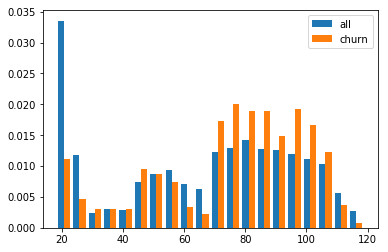

In [6]:
plt.hist([monthly_all, monthly_churn], label=['all', 'churn'], 
         bins=20, density=True)
plt.legend(loc='best')

In [7]:
monthly_all.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [8]:
monthly_churn.describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

### Services

In [9]:
df_phone = pd.read_csv('data/phone.csv', index_col='customerID')
df_phone['Phone'] = 'Yes'
df_internet = pd.read_csv('data/internet.csv', index_col='customerID')
df_internet['Internet'] = 'Yes'

In [10]:
df_services = df_churn.join([df_phone['Phone'], df_internet['Internet']])
df_services = df_services.fillna('No')
df_services.head()

,Churn,Phone,Internet
customerID,,,
7590-VHVEG,0,No,Yes
5575-GNVDE,0,Yes,Yes
3668-QPYBK,1,Yes,Yes
7795-CFOCW,0,No,Yes
9237-HQITU,1,Yes,Yes


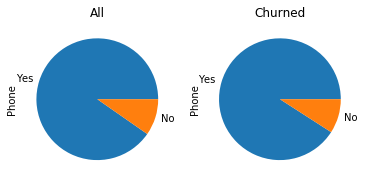

In [11]:
plt.subplot(1, 2, 1)
df_services['Phone'].value_counts().plot(kind='pie', title='All')
plt.subplot(1, 2, 2)
churned_phone = df_services[df_services['Churn'] == 1]['Phone']
churned_phone.value_counts().plot(kind='pie', ax=plt.gca(), title='Churned')

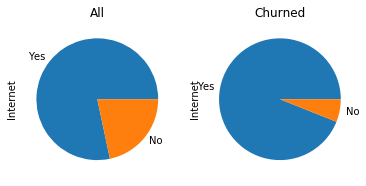

In [12]:
plt.subplot(1, 2, 1)
df_services['Internet'].value_counts().plot(kind='pie', title='All')
plt.subplot(1, 2, 2)
churned_internet = df_services[df_services['Churn'] == 1]['Internet']
churned_internet.value_counts().plot(kind='pie', ax=plt.gca(), title='Churned')